# Season VI: Exercises
#### Habib Ezatabadi
<br><br><br>
<hr><hr>
<br><br><br><br>

<br><br>
<br><br><br><br>

### Ex I.
        Apply k-means to the crime rate data after standardising each variable by its standard deviation. Compare the results with those given in
        the text found by standardising by a variable’s range.


<br><br>

In [2]:
library(MVA)
library(HSAUR2)
library(tidyverse)
library(cluster)
library(factoextra)
library(mclust)
library(rstatix)
library(ggpubr)

In [3]:
crime <- read_table(file = file.choose(), 
col_names = T, col_types = cols("c", "d", "d", "d", "d", "d", "d", "d"))

In [4]:
crime2 <- crime %>% 
column_to_rownames(var = "state") 
head(crime2)

,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ME,2.0,14.8,28,102,803,2347,164
NH,2.2,21.5,24,92,755,2208,228
VT,2.0,21.8,22,103,949,2697,181
MA,3.6,29.7,193,331,1071,2189,906
RI,3.5,21.4,119,192,1294,2568,705
CT,4.6,23.8,192,205,1198,2758,447


Murder     Rape  Robbery  Assault Burglary    Theft  Vehicle 
 0.02578  0.05687  0.03404  0.05440  0.05278  0.06411  0.06517

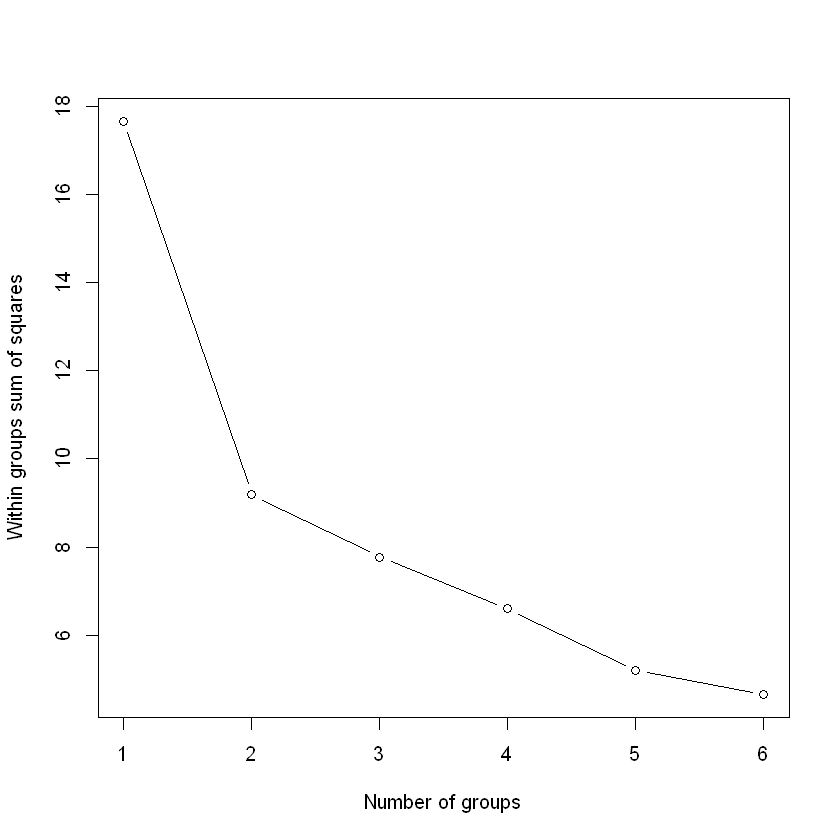

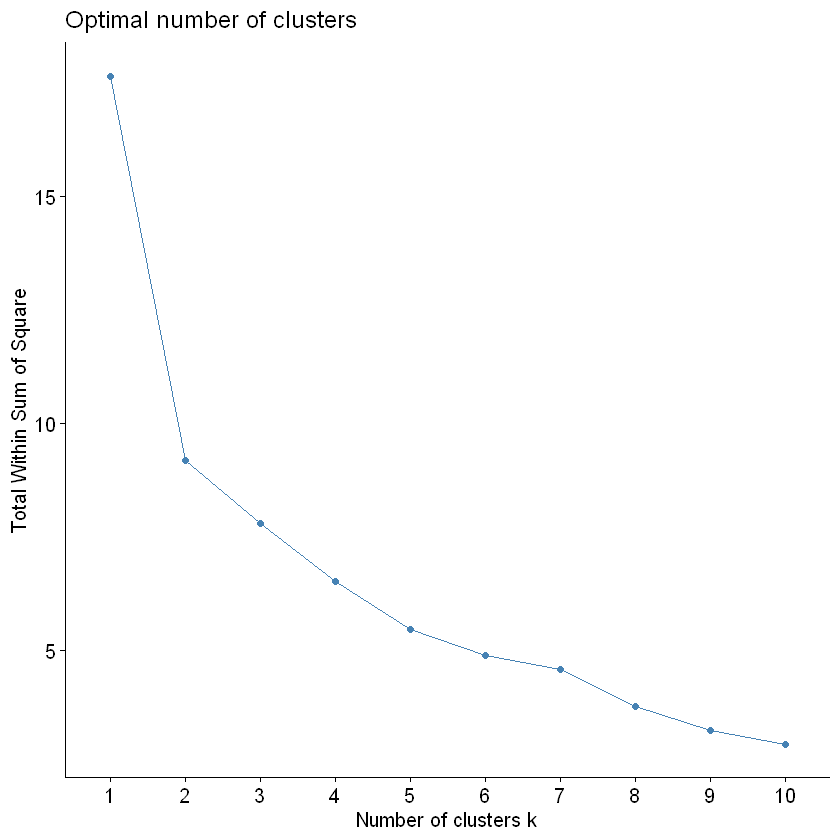

In [5]:
rge <- sapply(crime2, function(x) diff(range(x)))
crime_s <- sweep(crime2, 2, rge, FUN = "/")
sapply(crime_s, var) %>% round(5)
n <- nrow(crime_s)
 wss <- rep(0, 6)
wss[1] <- (n - 1) * sum(sapply(crime_s, var))
for (i in 2:6) wss[i] <- sum(kmeans(crime_s,centers = i)$withinss)
plot(1:6, wss, type = "b", xlab = "Number of groups",
 ylab = "Within groups sum of squares")

 fviz_nbclust(crime_s, FUNcluster = kmeans, method = "wss")

  cluster size ave.sil.width
1       1   29          0.50
2       2   22          0.27


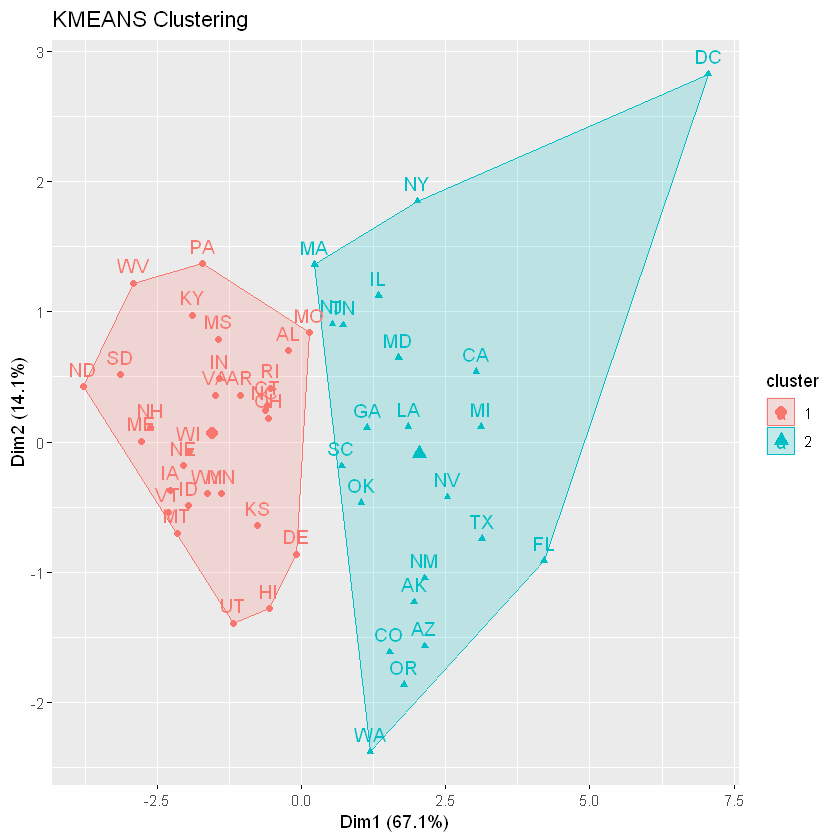

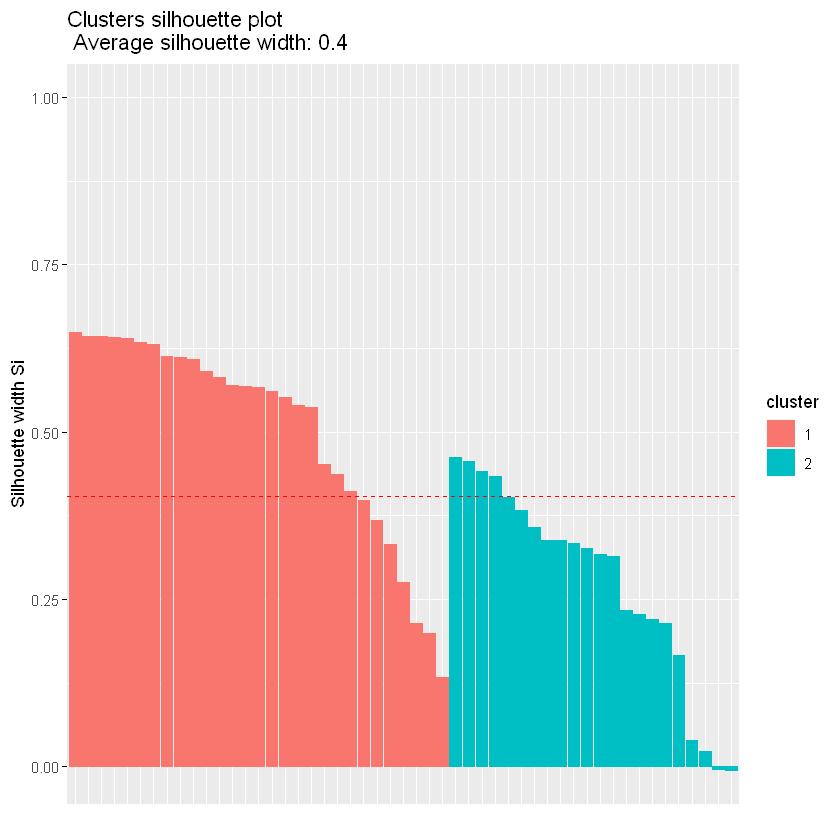

In [6]:
K <- eclust(crime_s, FUNcluster = "kmeans", k = 2, k.max = 10)
fviz_silhouette(K)


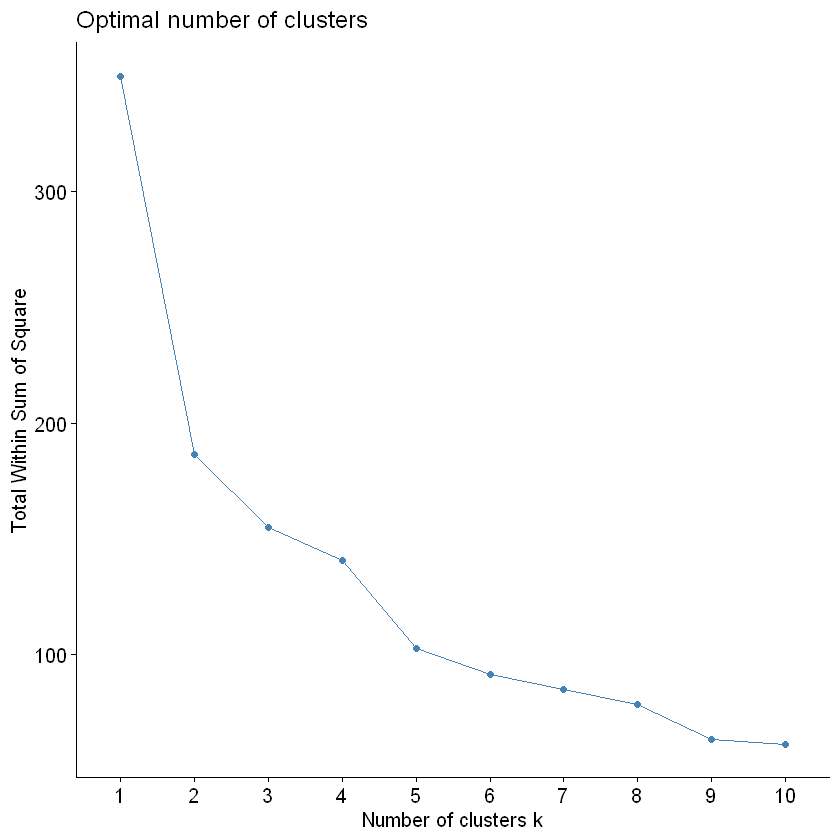

In [7]:
rge2 <- sapply(crime2, function(x) sd(x))
crime_s2 <- sweep(crime2, 2, rge2, FUN = "/")

 fviz_nbclust(crime_s2, FUNcluster = kmeans, method = "wss")


  cluster size ave.sil.width
1       1   30          0.49
2       2   21          0.28


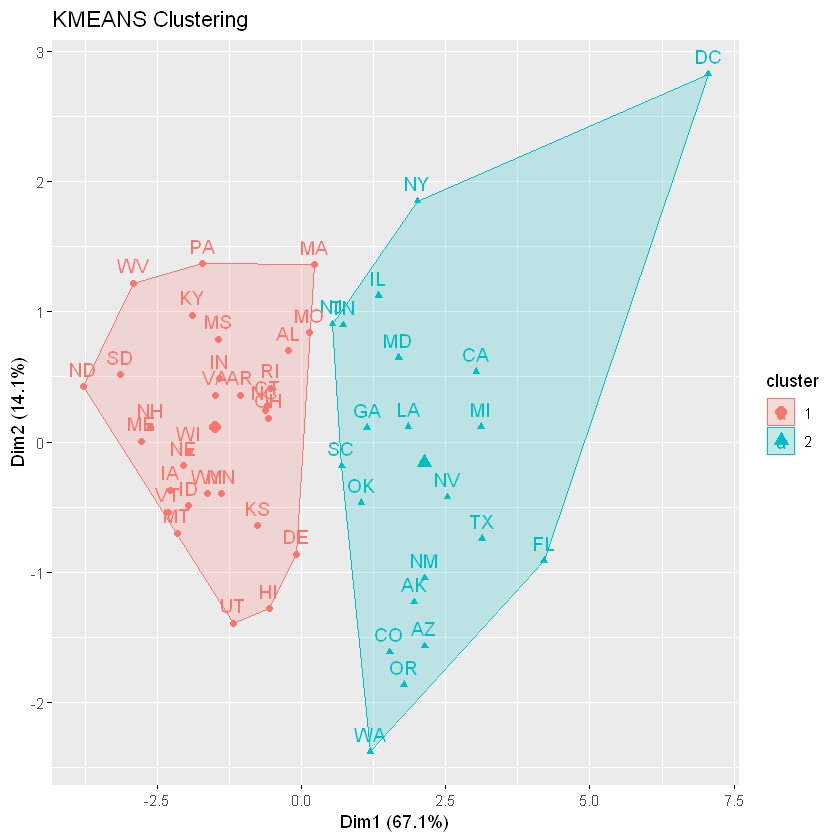

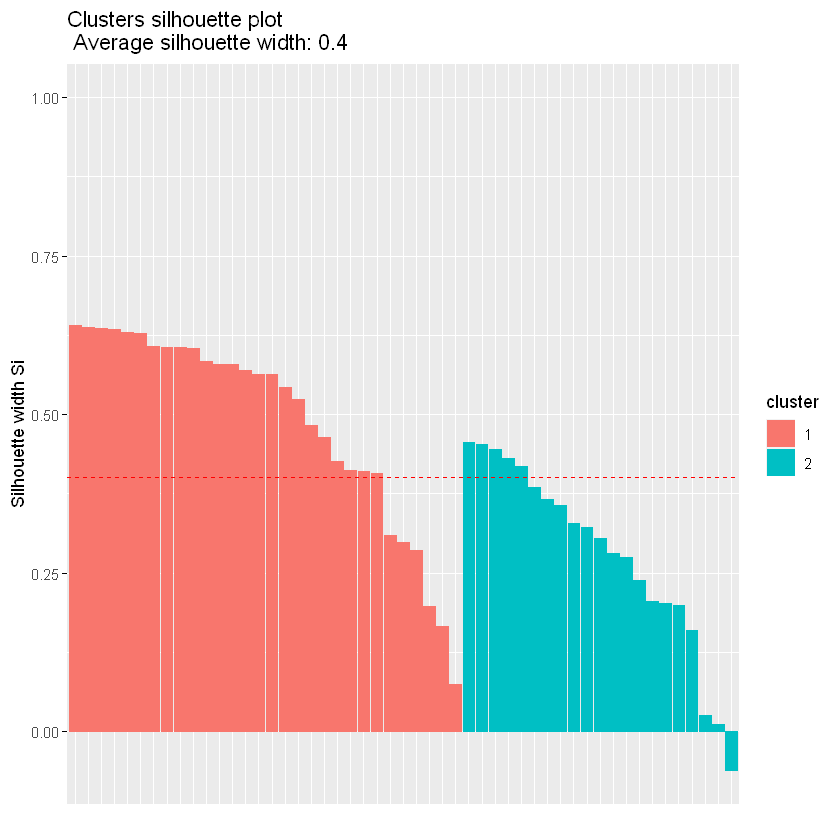

In [8]:
K2 <- eclust(crime_s2, FUNcluster = "kmeans", k = 2, k.max = 10)
fviz_silhouette(K2)

In [9]:
cbind(sd_way = K2$cluster,
range_way = K$cluster)

,sd_way,range_way
ME,1,1
NH,1,1
VT,1,1
MA,1,2
RI,1,1
CT,1,1
NY,2,2
NJ,2,2
PA,1,1
OH,1,1


<br><br>
<hr>
<br><br><br><br>

### Ex II.
    Calculate the first five principal components scores for the RomanoBritish pottery data, and then construct the scatterplot matrix 
    of the scores, displaying the  contours of the estimated bivariate density for each
    panel of the plot and a boxplot of each score in the appropriate place on
    the diagonal. Label the points in the scatterplot matrix with their kiln
    numbers.

<br><br><br>

In [10]:
head(pottery)
dim(pottery)

,Al2O3,Fe2O3,MgO,CaO,Na2O,K2O,TiO2,MnO,BaO,kiln
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18.8,9.52,2.00,0.79,0.40,3.20,1.01,0.077,0.015,1
2,16.9,7.33,1.65,0.84,0.40,3.05,0.99,0.067,0.018,1
3,18.2,7.64,1.82,0.77,0.40,3.07,0.98,0.087,0.014,1
4,16.9,7.29,1.56,0.76,0.40,3.05,1.00,0.063,0.019,1
5,17.8,7.24,1.83,0.92,0.43,3.12,0.93,0.061,0.019,1
6,18.8,7.45,2.06,0.87,0.25,3.26,0.98,0.072,0.017,1


[1] 45 10

In [11]:
pModel <- princomp(pottery[, -10], , cor = TRUE, scores = TRUE)
pModel

Call:
princomp(x = pottery[, -10], cor = TRUE, scores = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
2.0503433 1.5884850 0.9369854 0.6753828 0.6164727 0.5183982 0.3432531 0.3019006 
   Comp.9 
0.2845736 

 9  variables and  45 observations.

In [12]:
scores_dat <- pModel$scores
scores_dat %>% head
scores_dat_2 <- scores_dat[, 1:5] %>% as.data.frame

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9
1,-0.02384922,1.816627,-0.94273718,-0.7057926,0.7573237,0.6862660,-0.20812774,-0.2530509,-0.31551244
2,0.23323179,1.649566,-0.12094476,-0.2118457,-0.1104160,-0.1025332,0.05730680,-0.1745034,-0.05572727
3,0.12560474,1.270846,-1.02397180,-0.8336901,0.2853171,0.6387170,-0.28544936,0.1774527,0.06163149
4,0.32507686,1.701251,0.22210249,-0.1819194,-0.1350014,-0.1642698,0.07850102,-0.3289874,-0.10007837
5,0.16911084,1.905925,0.08711105,0.1035541,-0.2651996,0.2531592,0.32901272,-0.1349088,-0.07926497
6,0.36574760,1.362833,-0.27261725,0.2172105,0.7623773,0.4259296,-0.10815763,0.1427959,0.04006770


KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


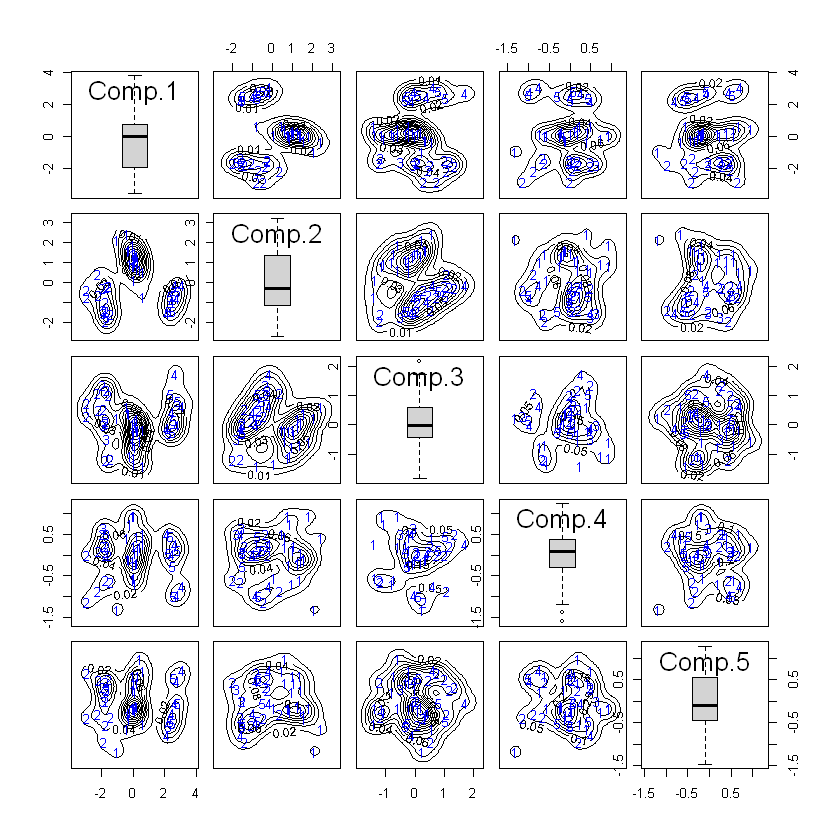

In [13]:
library("KernSmooth")
panel.bxp <- function(x, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 2, usr[3:4]))
    boxplot(x, add=TRUE)
}
pairs(scores_dat_2,
diag.panel = panel.bxp,
panel = function (x,y) {
data <- data.frame(cbind(x,y))
par(new = TRUE)
den <- bkde2D(data, bandwidth = sapply(data, dpik))
contour(x = den$x1, y = den$x2,
z = den$fhat, axes = FALSE)
text(x, y, labels = pottery$kiln, col = "blue")
})

<br><br><br><hr><br><br><br>

### Ex III.
         Return to the air pollution data given in Chapter 1 and use finite
        mixtures to cluster the data on the basis of the six climate and ecology
        variables (i.e., excluding the sulphur dioxide concentration). Investigate
        how sulphur dioxide concentration varies in the clusters you find both
        graphically and by formal significance testing

<br><br><br>

In [14]:
dat <- USairpollution %>% mutate(SO2 = NULL)   
head(dat)
dim(dat)

,temp,manu,popul,wind,precip,predays
,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
Albany,47.6,44,116,8.8,33.36,135
Albuquerque,56.8,46,244,8.9,7.77,58
Atlanta,61.5,368,497,9.1,48.34,115
Baltimore,55.0,625,905,9.6,41.31,111
Buffalo,47.1,391,463,12.4,36.11,166
Charleston,55.2,35,71,6.5,40.75,148


[1] 41  6

In [15]:
M_model <- Mclust(dat)
M_model

'Mclust' model object: (VEV,7) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

In [16]:
M_model$modelName

[1] "VEV"

In [79]:
M_model$BIC
M_model$classification

Bayesian Information Criterion (BIC): 
        EII       VII       EEI       VEI       EVI       VVI       EEE
1 -3571.331 -3571.331 -2440.020 -2440.020 -2440.020 -2440.020 -2320.070
2 -3334.778 -3240.504 -2429.738 -2404.271 -2366.283 -2394.392 -2330.839
3 -3272.205 -3192.073 -2421.146 -2384.667 -2361.713 -2391.504 -2337.984
4 -3270.090 -3071.803 -2423.948 -2377.936 -2373.524 -2379.639 -2320.252
5 -3296.091 -3002.247 -2439.159 -2388.967 -2378.675 -2393.596 -2339.694
6 -3322.153 -2981.116 -2386.392 -2364.826 -2397.830 -2416.404 -2358.177
7 -3058.807 -3007.322 -2390.433 -2377.974 -2411.945 -2415.546 -2335.415
8 -3078.540        NA -2354.307        NA        NA        NA -2350.123
9 -3079.666        NA -2382.734        NA        NA        NA -2346.345
       VEE       EVE       VVE       EEV       VEV       EVV       VVV
1 -2320.07 -2320.070 -2320.070 -2320.070 -2320.070 -2320.070 -2320.070
2 -2307.06 -2298.683 -2310.133 -2326.738 -2317.322 -2279.182 -2321.517
3       NA        NA        

Albany    Albuquerque        Atlanta      Baltimore        Buffalo 
             1              2              3              3              4 
    Charleston        Chicago     Cincinnati      Cleveland       Columbus 
             1              5              1              4              1 
        Dallas         Denver     Des Moines        Detroit       Hartford 
             5              2              6              5              3 
       Houston   Indianapolis   Jacksonville    Kansas City    Little Rock 
             5              3              7              3              3 
    Louisville        Memphis          Miami      Milwaukee    Minneapolis 
             3              3              7              4              4 
     Nashville    New Orleans        Norfolk          Omaha   Philadelphia 
             3              7              3              6              5 
       Phoenix     Pittsburgh     Providence       Richmond Salt Lake City 
             2              1              3              3              2 
 San Francisco        Seattle      St. Louis     Washington        Wichita 
             2              1              3              3              6 
    Wilmington 
             3

In [17]:
classs <- M_model$classification
dat2 <- data.frame(so2 = USairpollution$SO2, cluster = classs) %>% convert_as_factor(cluster)
dat2

,so2,cluster
,<int>,<fct>
Albany,46,1
Albuquerque,11,2
Atlanta,24,3
Baltimore,47,3
Buffalo,11,4
Charleston,31,1
Chicago,110,5
Cincinnati,23,1
Cleveland,65,4


In [18]:
Model_anova <- aov(so2 ~ cluster, dat2)
summary(Model_anova)

            Df Sum Sq Mean Sq F value Pr(>F)
cluster      6   4837   806.2   1.594  0.179
Residuals   34  17201   505.9               

In [92]:
model.tables(Model_anova, "means")

Tables of means
Grand mean
         
30.04878 

 cluster 
     1    2     3     4    5  6  7
    36 15.6 34.13 30.25 46.6 13 11
rep  6  5.0 15.00  4.00  5.0  3  3

In [22]:
anova_model2 <- anova_test(dat2, so2 ~ cluster)

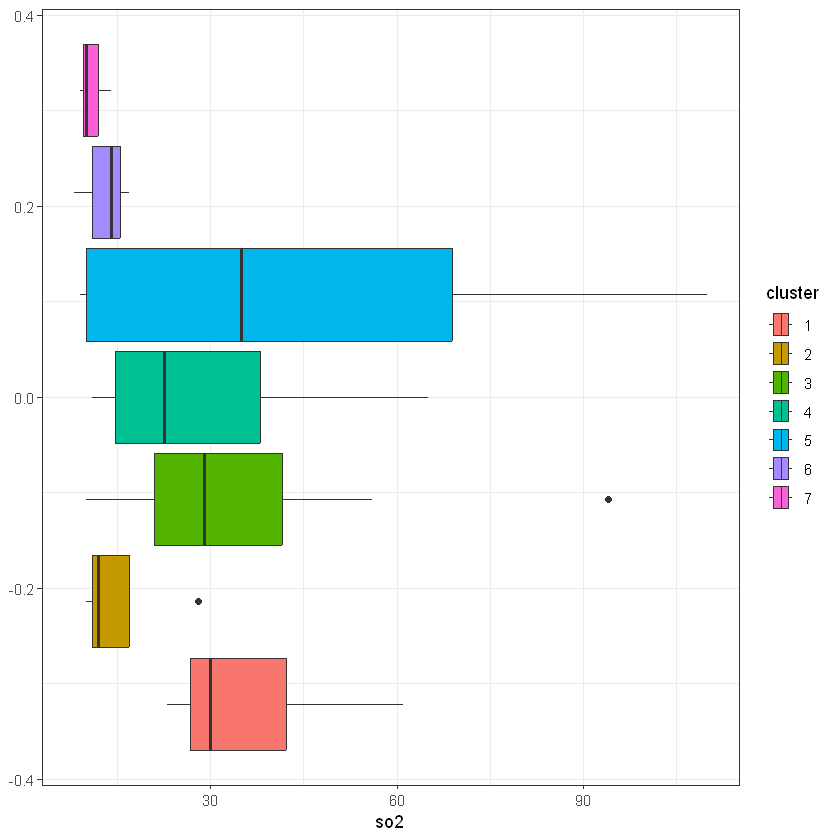

In [23]:
dat2 %>%
ggplot(aes(x = so2, group = cluster, fill = cluster)) +
geom_boxplot() + theme_bw()

In [24]:
dat2 %>% 
pairwise_t_test(so2 ~ cluster, p.adjust.method = "bonferroni") -> pwc
pwc

,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,so2,1,2,6,5,0.1430,ns,1.000,ns
2,so2,1,3,6,15,0.8650,ns,1.000,ns
3,so2,2,3,5,15,0.1200,ns,1.000,ns
4,so2,1,4,6,4,0.6950,ns,1.000,ns
5,so2,2,4,5,4,0.3380,ns,1.000,ns
6,so2,3,4,15,4,0.7610,ns,1.000,ns
7,so2,1,5,6,5,0.4420,ns,1.000,ns
8,so2,2,5,5,5,0.0363,*,0.763,ns
9,so2,3,5,15,5,0.2910,ns,1.000,ns


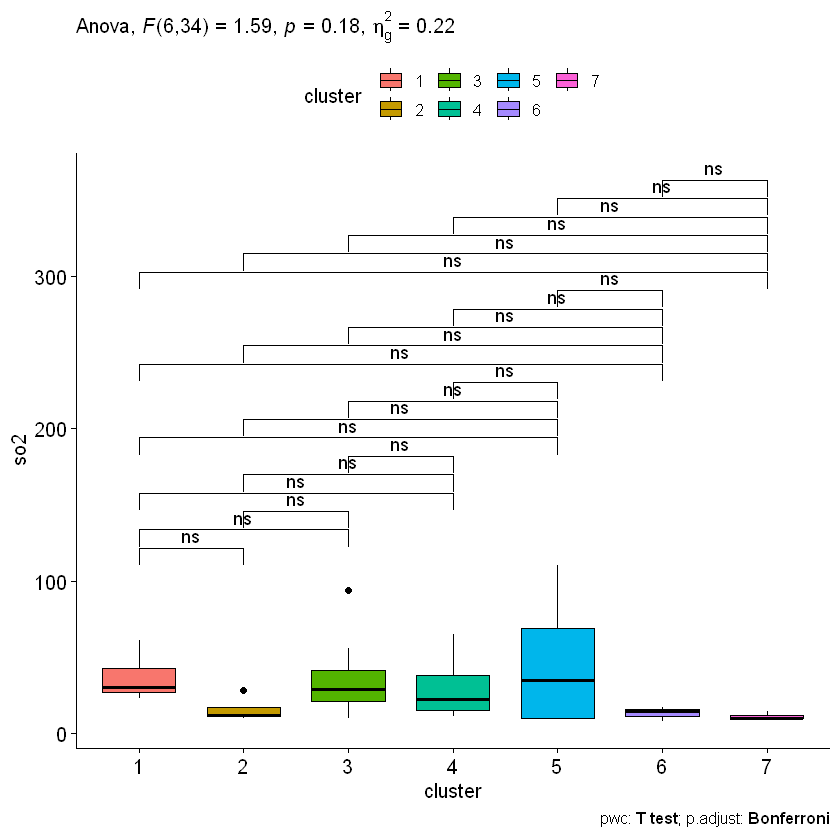

In [25]:
pwc %>% add_xy_position(x = "cluster") -> pwc
bxp <- ggboxplot(data = dat2, x = "cluster", y = "so2", fill = "cluster")
bxp +
  stat_pvalue_manual(pwc) + 
  labs(
    subtitle = get_test_label(anova_model2, detailed = TRUE),
    caption = get_pwc_label(pwc)
  )

In [26]:
dat2 %>% 
pairwise_wilcox_test(so2 ~ cluster, p.adjust.method = "bonferroni") -> pwc2
pwc2

,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,so2,1,2,6,5,28.0,0.017,0.363,ns
2,so2,1,3,6,15,51.5,0.640,1.000,ns
3,so2,1,4,6,4,15.5,0.521,1.000,ns
4,so2,1,5,6,5,14.0,0.931,1.000,ns
5,so2,1,6,6,3,18.0,0.024,0.500,ns
6,so2,1,7,6,3,18.0,0.024,0.500,ns
7,so2,2,3,5,15,12.0,0.029,0.607,ns
8,so2,2,4,5,4,5.5,0.325,1.000,ns
9,so2,2,5,5,5,9.5,0.600,1.000,ns


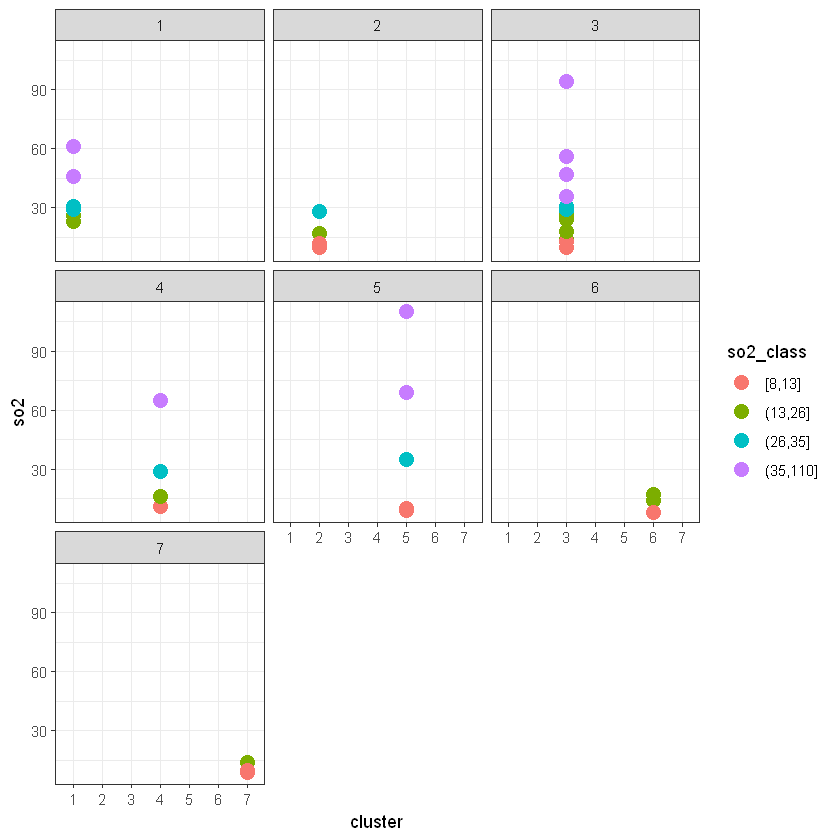

In [30]:
dat2 %>%
mutate(so2_class = cut_number(so2, 4)) %>%
ggplot(aes(x = cluster, y = so2, colour = so2_class, group = so2_class)) +
geom_point(size = 4) +
facet_wrap(vars(cluster)) + 
theme_bw()